In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl

In [2]:
## Create a dataframe of cities
City_data = {'City': ['New York', 'London','Edinburgh', 'Toronto', 'Sydney', 
                      'Singapore', 'Melbourne', 'Hong Kong', 'Los Angeles',
                      'Chicago', 'Boston', 'San Francisco', 'Dublin', 'Washington','Beijing',
                      'Shanghai','Guangzhou', 'Shenzhen', 'Mumbai', 'Tokyo', 'Seoul–Incheon','Moscow','Paris',
                      'Taipei', 'Berlin', 'Jakarta', 'Mexico City','Delhi','Kolkata']}
City_df = pd.DataFrame(City_data)

## add up columns of 'Lat', 'Lng', 'Country'
## For lar, and lng, we use zero values first for later data fill-in
City_df.insert(1, 'Latitude', np.zeros(29))
City_df.insert(2, 'Longitude', np.zeros(29))
City_df.insert(3, 'Country', ['US', 'UK', 'UK', 'Canada', 'Australia', 'Singapore', 'Australia', 'China',
                              'US', 'US', 'US', 'US', 'Ireland', 'US', 'China', 'China', 'China', 'China',
                              'India', 'Japan', 'South Korea', 'Russia', 'France', 'China', 'Germany', 'Indonesia', 'Mexico','India','India'])

In [3]:
City_df.iloc[0]

City         New York
Latitude            0
Longitude           0
Country            US
Name: 0, dtype: object

In [4]:
City_df.head(29)

,City,Latitude,Longitude,Country
0,New York,0.0,0.0,US
1,London,0.0,0.0,UK
2,Edinburgh,0.0,0.0,UK
3,Toronto,0.0,0.0,Canada
4,Sydney,0.0,0.0,Australia
5,Singapore,0.0,0.0,Singapore
6,Melbourne,0.0,0.0,Australia
7,Hong Kong,0.0,0.0,China
8,Los Angeles,0.0,0.0,US
9,Chicago,0.0,0.0,US


In [5]:
## Import necessary libraries
import geopy
from geopy.geocoders import Nominatim

## use geolocation package to retrieve location features (lat & lng) into the dataframe 
for index, row in City_df.iterrows():
    city = row['City']
    geolocator = Nominatim(user_agent = "explorer2")
    location_city = geolocator.geocode(str(city))
    lat_city = location_city.latitude
    lng_city = location_city.longitude
    City_df.loc[index, 'Latitude'] = lat_city
    City_df.loc[index, 'Longitude'] = lng_city
    
City_df.head(29)

,City,Latitude,Longitude,Country
0,New York,40.712728,-74.006015,US
1,London,51.507322,-0.127647,UK
2,Edinburgh,55.953346,-3.188375,UK
3,Toronto,43.653482,-79.383935,Canada
4,Sydney,-33.854816,151.216454,Australia
5,Singapore,1.340863,103.830392,Singapore
6,Melbourne,-37.814218,144.963161,Australia
7,Hong Kong,22.279328,114.162813,China
8,Los Angeles,34.053691,-118.242767,US
9,Chicago,41.875562,-87.624421,US


In [6]:
## Install relevant packages for visualization
!conda install -c conda-forge folium=0.5.0 --yes

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    folium-0.5.0               |             py_0          45 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    ------------------------------------------------------------
                       

In [7]:
## import necessary lib
import folium

## create a world map
world_map = folium.Map()

## add location marks on the world map
for lati, lngi, city in zip(City_df['Latitude'], City_df['Longitude'], City_df['City']):
    label = '{}'.format(city)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lati, lngi],
        radius = 3,
        popup = label,
        color = 'blue',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.6,
        parse_html = False
    ).add_to(world_map)
    
world_map

In [8]:
## import necessary packages
import requests

## Client Information for Foursquare
CLIENT_ID = "YYZIJHKGABGQIHFD4SQH0RKMCD5E3JPUAIRCM1QLOANUILAU"
CLIENT_SECRET = "IQDDZ201VFA0XFRA2U1RKP30BDBYKL0XG42AXJ0LHKLTOPKX"
VERSION = '20190829'
LIMIT = 500

In [9]:
## Create a function to repeat process for all neighborhoods
def getNearbyVenues(names, latitudes, longitudes, radius=10000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        
        # create the API request URL
        url_city = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url_city).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    return nearby_venues

In [10]:
 ## Fill in the location inforation of cities into the function and return a s egregated dataframe of venues for all cities 
    world_venues = getNearbyVenues(names = City_df['City'], latitudes = City_df[ 'Latitude'], longitudes = City_df['Longitude']) 
    world_venues.head() 

,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,New York,40.712728,-74.006015,Aire Ancient Baths,40.718141,-74.004941,Spa
1,New York,40.712728,-74.006015,9/11 Memorial North Pool,40.712077,-74.013187,Memorial Site
2,New York,40.712728,-74.006015,One World Trade Center,40.713069,-74.013133,Building
3,New York,40.712728,-74.006015,Washington Market Park,40.717046,-74.011095,Playground
4,New York,40.712728,-74.006015,Crown Shy,40.706187,-74.007490,Restaurant


In [11]:
## Check out the size of the dataset
world_venues.shape

(2900, 7)

In [12]:
## Apply onehot-coding to venue categories 
world_onehot = pd.get_dummies(world_venues['Venue Category'], prefix = "", prefix_sep= "")
world_onehot.head()

,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Amphitheater,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,...,Wine Shop,Winery,Women's Store,Xinjiang Restaurant,Yakitori Restaurant,Yoga Studio,Yoshoku Restaurant,Yunnan Restaurant,Zhejiang Restaurant,Zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
## Add city column back to dataframe
world_onehot[['City']] = world_venues[['City']]

# move city column to the first column
fixed_columns = [world_onehot.columns[-1]] + list(world_onehot.columns[:-1])
world_onehot_city = world_onehot[fixed_columns]

world_onehot_city.head()

,City,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Amphitheater,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,...,Wine Shop,Winery,Women's Store,Xinjiang Restaurant,Yakitori Restaurant,Yoga Studio,Yoshoku Restaurant,Yunnan Restaurant,Zhejiang Restaurant,Zoo
0,New York,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,New York,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,New York,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,New York,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,New York,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
## Group the dataset by the city names to check out the percentage of each venue categores 
world_grouped = world_onehot_city.groupby('City').mean().reset_index()
world_grouped.head()

,City,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Amphitheater,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,...,Wine Shop,Winery,Women's Store,Xinjiang Restaurant,Yakitori Restaurant,Yoga Studio,Yoshoku Restaurant,Yunnan Restaurant,Zhejiang Restaurant,Zoo
0,Beijing,0.0,0.0,0.0,0.01,0.00,0.00,0.00,0.0,0.01,...,0.00,0.0,0.0,0.01,0.0,0.00,0.0,0.02,0.01,0.0
1,Berlin,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.01,...,0.01,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.0
2,Boston,0.0,0.0,0.0,0.03,0.00,0.01,0.00,0.0,0.00,...,0.01,0.0,0.0,0.00,0.0,0.01,0.0,0.00,0.00,0.0
3,Chicago,0.0,0.0,0.0,0.01,0.01,0.00,0.00,0.0,0.00,...,0.00,0.0,0.0,0.00,0.0,0.03,0.0,0.00,0.00,0.0
4,Delhi,0.0,0.0,0.0,0.00,0.00,0.00,0.01,0.0,0.01,...,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.0


In [15]:
## Define a function that sorts the values in rows

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [16]:
## create columns according to number of top venues
columns = ['City']
for ind in np.arange(10):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

## Create a dataframe
## set up the column names for the dataframe
City_venue_sorted = pd.DataFrame(columns = columns)

## set the column of "City" 
City_venue_sorted['City'] = world_grouped['City']

## Set the other column values -- the top 10 venue names
for ind in np.arange(world_grouped.shape[0]):
    City_venue_sorted.iloc[ind, 1:] = return_most_common_venues(world_grouped.iloc[ind, :], 10)

City_venue_sorted

,City,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Beijing,Hotel,Historic Site,Park,Shopping Mall,Dumpling Restaurant,Café,Coffee Shop,Pizza Place,Bookstore,Temple
1,Berlin,Coffee Shop,Bookstore,Park,Ice Cream Shop,Concert Hall,Indie Movie Theater,Café,Wine Bar,Monument / Landmark,Bakery
2,Boston,Bakery,Park,Italian Restaurant,Hotel,Seafood Restaurant,Ice Cream Shop,American Restaurant,Gastropub,Historic Site,Gym
3,Chicago,Hotel,Park,Theater,Italian Restaurant,Yoga Studio,Grocery Store,New American Restaurant,Coffee Shop,Sandwich Place,Steakhouse
4,Delhi,Indian Restaurant,Hotel,Café,Bar,BBQ Joint,Lounge,Deli / Bodega,Tibetan Restaurant,Fast Food Restaurant,Coffee Shop
5,Dublin,Café,Pub,Coffee Shop,Park,Restaurant,Hotel,Plaza,Beer Bar,Brewery,Gastropub
6,Edinburgh,Hotel,Park,Pub,Coffee Shop,Café,Cocktail Bar,Beer Bar,Bar,Bakery,Restaurant
7,Guangzhou,Hotel,Shopping Mall,Coffee Shop,Park,Turkish Restaurant,Cantonese Restaurant,Chinese Restaurant,New American Restaurant,Middle Eastern Restaurant,Dessert Shop
8,Hong Kong,Hotel,Coffee Shop,Café,Shopping Mall,Park,Scenic Lookout,Italian Restaurant,Supermarket,Dumpling Restaurant,Dessert Shop
9,Jakarta,Hotel,Coffee Shop,Shopping Mall,Sushi Restaurant,Fast Food Restaurant,Indonesian Restaurant,Buffet,Bakery,Restaurant,BBQ Joint


In [17]:
## Import necessary lib
import pandas as pd
import requests
from bs4 import BeautifulSoup

## scrape datasets from website -- wikipedia page table
res = requests.get("https://en.wikipedia.org/wiki/List_of_cities_by_GDP")
soup = BeautifulSoup(res.content, 'lxml')
table = soup.find_all('table')[0]
City_GDP = pd.read_html(str(table))
City_GDP_dp = City_GDP[0][['City proper /Metropolitan area', 'Brookings Institution[5]2014 est.PPP-adjustedGDP ($BN)']]
City_GDP_dp.head()

,City proper /Metropolitan area,Brookings Institution[5]2014 est.PPP-adjustedGDP ($BN)
0,Aachen-Liège-Maastricht,99.7
1,Aberdeen,NaN
2,Abidjan,NaN
3,Abu Dhabi,178.3
4,Addis Ababa,NaN


In [18]:
## Change the column names for convenience
City_GDP_dp.columns = ['City', 'GDP']

## convert city names in world_grouped dataframe into a list
city_list = world_grouped['City'].tolist()

## Filter out data for relevant cities
gdp_filtered = []
for index, row in City_GDP_dp.iterrows():
    if row['City'] in city_list:
        gdp_filtered.append([row['City'], row['GDP']])

## print out city names that match >> turn out there are two cities that are not matched in the dataframe >> Seoul–Incheon & Washington
gdp_filtered

[['Beijing', '506.1'],
 ['Berlin', '157.7'],
 ['Boston', '360.1'],
 ['Chicago', '563.2'],
 ['Dublin', '90.1'],
 ['Edinburgh', '32.5'],
 ['Guangzhou', '380.3'],
 ['Hong Kong', '416.0'],
 ['Jakarta', '321.3'],
 ['Kolkata', '150[29]'],
 ['London', '835.7'],
 ['Los Angeles', '860.5'],
 ['Melbourne', '178.4'],
 ['Mexico City', '403.6'],
 ['Moscow', '553.3'],
 ['Mumbai', '368[9]'],
 ['New York', '1403'],
 ['Paris', '715.1'],
 ['San Francisco', '331.0'],
 ['Shanghai', '594.0'],
 ['Shenzhen', '363.2'],
 ['Singapore', '365.9'],
 ['Sydney', '223.4'],
 ['Taipei', '327.3'],
 ['Tokyo', '1617'],
 ['Toronto', '276.3']]

In [19]:
gdp_filtered[4]=['Delhi', '293.6']
gdp_filtered[5]=['Dublin', '90.1']
gdp_filtered[6]=['Edinburgh', '32.5']
gdp_filtered[7]=['Guangzhou', '380.3']
gdp_filtered[8]=['Hong Kong', '416.0']
gdp_filtered[9]=['Jakarta', '321.3']
gdp_filtered[10]=['Kolkata', '150.36']
gdp_filtered[11]=['London', '835.7']
gdp_filtered[12]=['Los Angeles', '860.5']
gdp_filtered[13]=['Melbourne', '178.4']
gdp_filtered[14]=['Mexico City', '403.6']
gdp_filtered[15]=['Moscow', '553.3']
gdp_filtered[16]=['Mumbai', '150.9']
gdp_filtered[17]=['New York', '1403.0']
gdp_filtered[18]=['Paris', '715.1']
gdp_filtered[19]=['San Francisco', '331.0']
gdp_filtered[20]=['Shanghai', '594.0']
gdp_filtered[21]=['Shenzhen', '363.2']
gdp_filtered[22]=['Singapore', '365.9']
gdp_filtered[23]=['Sydney', '223.4']
gdp_filtered[24]=['Taipei', '327.3']
gdp_filtered[25]=['Tokyo', '1617.0']
gdp_filtered.append(['Toronto','276.3'])
gdp_filtered.append(['Seoul','845.9'])
gdp_filtered.append(['Washington, DC','442.2'])

In [20]:
gdp_filtered

[['Beijing', '506.1'],
 ['Berlin', '157.7'],
 ['Boston', '360.1'],
 ['Chicago', '563.2'],
 ['Delhi', '293.6'],
 ['Dublin', '90.1'],
 ['Edinburgh', '32.5'],
 ['Guangzhou', '380.3'],
 ['Hong Kong', '416.0'],
 ['Jakarta', '321.3'],
 ['Kolkata', '150.36'],
 ['London', '835.7'],
 ['Los Angeles', '860.5'],
 ['Melbourne', '178.4'],
 ['Mexico City', '403.6'],
 ['Moscow', '553.3'],
 ['Mumbai', '150.9'],
 ['New York', '1403.0'],
 ['Paris', '715.1'],
 ['San Francisco', '331.0'],
 ['Shanghai', '594.0'],
 ['Shenzhen', '363.2'],
 ['Singapore', '365.9'],
 ['Sydney', '223.4'],
 ['Taipei', '327.3'],
 ['Tokyo', '1617.0'],
 ['Toronto', '276.3'],
 ['Seoul', '845.9'],
 ['Washington, DC', '442.2']]

In [21]:

## Convert the list into a dataframe 
gdp_filtered_df = pd.DataFrame(gdp_filtered)
gdp_filtered_df.columns = ['City', 'GDP']

## drop repeated rows in the dataframe and convert GDP column into float
gdp_filtered_df = pd.DataFrame(gdp_filtered_df.drop_duplicates())
gdp_filtered_df['GDP'] = pd.to_numeric(gdp_filtered_df['GDP'])

In [22]:
gdp_filtered_df.shape

(29, 2)

In [23]:
gdp_filtered_df.head(29)

,City,GDP
0,Beijing,506.10
1,Berlin,157.70
2,Boston,360.10
3,Chicago,563.20
4,Delhi,293.60
5,Dublin,90.10
6,Edinburgh,32.50
7,Guangzhou,380.30
8,Hong Kong,416.00
9,Jakarta,321.30


In [24]:
## Rank Cities in GDP values and sort values
gdp_filtered_sorted = gdp_filtered_df.sort_values('GDP', ascending = False)
gdp_filtered_sorted.head(10)

,City,GDP
25,Tokyo,1617.0
17,New York,1403.0
12,Los Angeles,860.5
27,Seoul,845.9
11,London,835.7
18,Paris,715.1
20,Shanghai,594.0
3,Chicago,563.2
15,Moscow,553.3
0,Beijing,506.1


In [25]:
## The last 5 cities in rank of GDP
gdp_filtered_sorted.tail(5)

,City,GDP
1,Berlin,157.70
16,Mumbai,150.90
10,Kolkata,150.36
5,Dublin,90.10
6,Edinburgh,32.50


In [26]:
## Visualize the ranking with a bar chart
gdp_visualize = gdp_filtered_sorted
gdp_visualize = gdp_visualize.set_index('City')
import matplotlib as mpl
gdp_visualize.plot(kind = 'barh',
                        figsize = (10, 10))

In [27]:
## reset index for GDP dataset
gdp_filtered_sorted1 = gdp_filtered_sorted.reset_index().drop(['index'], axis = 1)

In [28]:
## import necessary libs
from sklearn import preprocessing

## Standardize datasets
scaler = preprocessing.StandardScaler()
gdp_array = np.array(gdp_filtered_sorted['GDP'])
gdp_normalized_array = preprocessing.normalize([gdp_array])

## add the normalized gdp back into the dataframe
gdp_column = pd.DataFrame(gdp_normalized_array).transpose()
gdp_filtered_sorted1.insert(1, 'Normalized GDP', gdp_column)
gdp_filtered_sorted1.head()

,City,Normalized GDP,GDP
0,Tokyo,0.506392,1617.0
1,New York,0.439374,1403.0
2,Los Angeles,0.269481,860.5
3,Seoul,0.264909,845.9
4,London,0.261714,835.7


In [29]:
## scrape datasets from website -- wikipedia page table
import requests
from bs4 import BeautifulSoup
import pandas as pd

## scrape data from the Wikipedia avergae temperature page
res1 = requests.get("https://en.wikipedia.org/wiki/List_of_cities_by_average_temperature")
soup1 = BeautifulSoup(res1.content, 'lxml')

## scrape Asia table
table_Asia = soup1.find_all('table')[1]
Asia_temp = pd.read_html(str(table_Asia))[0]

## scrape Europe table
table_Europe = soup1.find_all('table')[2]
Europe_temp = pd.read_html(str(table_Europe))[0]

## scrape America table
table_America = soup1.find_all('table')[3]
America_temp = pd.read_html(str(table_America))[0]

## scrape Australia table
table_Australia = soup1.find_all('table')[4]
Australia_temp = pd.read_html(str(table_Australia))[0]

Australia_temp.tail()

,Country,City,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year,Ref.
21,New Zealand,Wellington,16.9(62.4),17.2(63.0),15.8(60.4),13.7(56.7),11.7(53.1),9.7(49.5),8.9(48.0),9.4(48.9),10.8(51.4),12.0(53.6),13.5(56.3),15.4(59.7),12.9(55.2),[356]
22,Papua New Guinea,Port Moresby,27.4(81.3),27.3(81.1),27.1(80.8),27.0(80.6),26.9(80.4),26.1(79.0),25.7(78.3),26.1(79.0),26.5(79.7),27.5(81.5),27.6(81.7),27.8(82.0),26.9(80.4),[357]
23,Solomon Islands,Honiara,26.7(80.1),26.6(79.9),26.6(79.9),26.5(79.7),26.6(79.9),26.4(79.5),26.1(79.0),26.2(79.2),26.5(79.7),26.5(79.7),26.7(80.1),26.8(80.2),26.5(79.7),[358]
24,United States,Honolulu,22.9(73.2),22.9(73.2),23.7(74.7),24.6(76.3),25.6(78.1),26.8(80.2),27.4(81.3),27.8(82.0),27.6(81.7),26.8(80.2),25.4(77.7),23.8(74.8),25.4(77.7),[359]
25,Vanuatu,Port Vila,26.4(79.5),26.5(79.7),26.3(79.3),25.3(77.5),24.1(75.4),23.0(73.4),22.1(71.8),22.0(71.6),22.7(72.9),23.4(74.1),24.6(76.3),25.7(78.3),24.3(75.7),[360]


In [30]:
## set up a list to store relevant data
temp_list = []

## Filter out data for relevant cities >> in Asia
for index, row in Asia_temp.iterrows():
    if row['City'] in city_list:
        temp_list.append([row['City'], row['Year']])

## Filter out data for relevant cities >> in Europe
for index, row in Europe_temp.iterrows():
    if row['City'] in city_list:
        temp_list.append([row['City'], row['Year']])       
 
 ## Filter out data for relevant cities >> in America
for index, row in America_temp.iterrows():
    if row['City'] in city_list:
        temp_list.append([row['City'], row['Year']])  

## Filter out data for relevant cities >> in Australia
for index, row in Australia_temp.iterrows():
    if row['City'] in city_list:
        temp_list.append([row['City'], row['Year']])  

## check if data for all cities are successfully extracted
len(temp_list)

23

In [31]:
## check out which cities are missing
temp_list

[['Beijing', '12.9(55.2)'],
 ['Guangzhou', '22.4(72.3)'],
 ['Shanghai', '16.7(62.1)'],
 ['Hong Kong', '23.3(73.9)'],
 ['Kolkata', '26.7(80.1)'],
 ['Mumbai', '27.1(80.8)'],
 ['Jakarta', '26.7(80.1)'],
 ['Tokyo', '15.4(59.7)'],
 ['Singapore', '27(81)'],
 ['Taipei', '23.0(73.4)'],
 ['Paris', '12.3(54.1)'],
 ['Berlin', '10.3(50.5)'],
 ['Dublin', '9.8(49.6)'],
 ['Moscow', '5.8(42.4)'],
 ['Edinburgh', '9.3(48.7)'],
 ['London', '10.3(50.5)'],
 ['Toronto', '9.4(48.9)'],
 ['Mexico City', '17.5(63.5)'],
 ['Boston', '10.9(51.7)'],
 ['Chicago', '9.8(49.7)'],
 ['Los Angeles', '18.6(65.4)'],
 ['Melbourne', '15.1(59.2)'],
 ['Sydney', '17.7(63.9)']]

In [32]:
## add up the missing cities
## Seoul
for index, row in Asia_temp.iterrows():
    if row['City'] in ['Seoul']:
        temp_list.append(['Seoul–Incheon', row['Year']])
        
## Washington,D.C., San Francisco, New York City
for index, row in America_temp.iterrows():
    if row['City'] in ['New York City' ]:
        temp_list.append(['New York', row['Year']])  
        
## Manually add up the rest from online sources
temp_list.append(['San Francisco', '14.6()'])
temp_list.append(['Washinton DC', '14.6()'])
temp_list.append(['Shenzhen', '22.9()'])
temp_list.append(['Guangzhou', '22.2()'])
temp_list.append(['Delhi', '29.2()'])
        
len(temp_list)

30

In [33]:
## convert temp_list into a dataframe
temp_df = pd.DataFrame(temp_list)
temp_df.columns = ['City', 'Temperature']

## drop out the F temp in the ()
for index, row in temp_df.iterrows():
    row['Temperature'] = row['Temperature'].split('(')[0]

## convert temperature values into int
temp_df['Temperature'] = pd.to_numeric(temp_df['Temperature'])

temp_df.head()

,City,Temperature
0,Beijing,12.9
1,Guangzhou,22.4
2,Shanghai,16.7
3,Hong Kong,23.3
4,Kolkata,26.7


In [34]:
## Rank Cities in Temperature values and sort values
temp_sorted = temp_df.sort_values('Temperature', ascending = False)
temp_sorted.head(10)

,City,Temperature
29,Delhi,29.2
5,Mumbai,27.1
8,Singapore,27.0
6,Jakarta,26.7
4,Kolkata,26.7
3,Hong Kong,23.3
9,Taipei,23.0
27,Shenzhen,22.9
1,Guangzhou,22.4
28,Guangzhou,22.2


In [35]:
## The last 10 cities in rank of tempature
temp_sorted.tail(10)

,City,Temperature
23,Seoul–Incheon,12.5
10,Paris,12.3
18,Boston,10.9
11,Berlin,10.3
15,London,10.3
19,Chicago,9.8
12,Dublin,9.8
16,Toronto,9.4
14,Edinburgh,9.3
13,Moscow,5.8


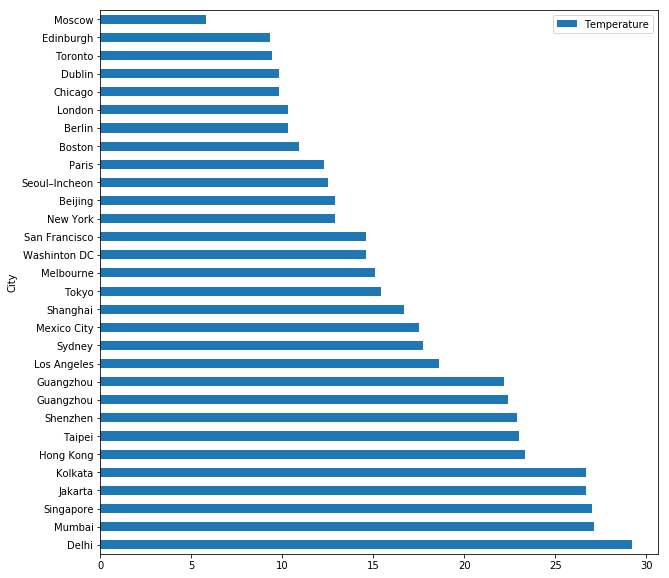

In [36]:
## Visualize the ranking with a bar chart
temp_visualize = temp_sorted
temp_visualize = temp_visualize.set_index('City')
temp_visualize.plot(kind = 'barh',
                   figsize = (10, 10))

In [37]:
## reset index for Temperature dataset
temp_sorted = temp_sorted.reset_index().drop(['index'], axis = 1)

In [38]:
## Standardize datasets
scaler_temp = preprocessing.StandardScaler()
temp_array = np.array(temp_sorted['Temperature'])
temp_normalized_array = preprocessing.normalize([temp_array])

## add the normalized gdp back into the dataframe
temp_column = pd.DataFrame(temp_normalized_array).transpose()
temp_sorted.insert(1, 'Normalized Temperature', temp_column)
temp_sorted.head()

,City,Normalized Temperature,Temperature
0,Delhi,0.294356,29.2
1,Mumbai,0.273187,27.1
2,Singapore,0.272179,27.0
3,Jakarta,0.269155,26.7
4,Kolkata,0.269155,26.7


In [39]:
## make sure the city names are the same
gdp_filtered_sorted1= gdp_filtered_sorted1.replace('Seoul-Incheon', 'Seoul')
gdp_filtered_sorted1 = gdp_filtered_sorted1.replace('Washington, DC', 'Washington')
temp_sorted = temp_sorted.replace('Washinton DC', 'Washington')
temp_sorted = temp_sorted.replace('Seoul–Incheon', 'Seoul')
world_grouped = world_grouped.replace('Seoul–Incheon', 'Seoul')

In [40]:
## merge GDP data
world_merged_cluster = world_grouped
world_merged_cluster = world_merged_cluster.join(gdp_filtered_sorted1.set_index('City'), on = 'City')

# merge Temperature data
world_merged_cluster = world_merged_cluster.join(temp_sorted.set_index('City'), on = 'City')
world_merged_cluster.head()

,City,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Amphitheater,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,...,Yakitori Restaurant,Yoga Studio,Yoshoku Restaurant,Yunnan Restaurant,Zhejiang Restaurant,Zoo,Normalized GDP,GDP,Normalized Temperature,Temperature
0,Beijing,0.0,0.0,0.0,0.01,0.00,0.00,0.00,0.0,0.01,...,0.0,0.00,0.0,0.02,0.01,0.0,0.158494,506.1,0.130041,12.9
1,Berlin,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.01,...,0.0,0.00,0.0,0.00,0.00,0.0,0.049387,157.7,0.103831,10.3
2,Boston,0.0,0.0,0.0,0.03,0.00,0.01,0.00,0.0,0.00,...,0.0,0.01,0.0,0.00,0.00,0.0,0.112772,360.1,0.109880,10.9
3,Chicago,0.0,0.0,0.0,0.01,0.01,0.00,0.00,0.0,0.00,...,0.0,0.03,0.0,0.00,0.00,0.0,0.176376,563.2,0.098791,9.8
4,Delhi,0.0,0.0,0.0,0.00,0.00,0.00,0.01,0.0,0.01,...,0.0,0.00,0.0,0.00,0.00,0.0,0.091946,293.6,0.294356,29.2


In [41]:
## Drop GDP and Temperature columns
world_merged_cluster = world_merged_cluster.drop(['GDP', 'Temperature'], axis = 1)
world_merged_cluster.head()

,City,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Amphitheater,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,...,Women's Store,Xinjiang Restaurant,Yakitori Restaurant,Yoga Studio,Yoshoku Restaurant,Yunnan Restaurant,Zhejiang Restaurant,Zoo,Normalized GDP,Normalized Temperature
0,Beijing,0.0,0.0,0.0,0.01,0.00,0.00,0.00,0.0,0.01,...,0.0,0.01,0.0,0.00,0.0,0.02,0.01,0.0,0.158494,0.130041
1,Berlin,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.01,...,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.049387,0.103831
2,Boston,0.0,0.0,0.0,0.03,0.00,0.01,0.00,0.0,0.00,...,0.0,0.00,0.0,0.01,0.0,0.00,0.00,0.0,0.112772,0.109880
3,Chicago,0.0,0.0,0.0,0.01,0.01,0.00,0.00,0.0,0.00,...,0.0,0.00,0.0,0.03,0.0,0.00,0.00,0.0,0.176376,0.098791
4,Delhi,0.0,0.0,0.0,0.00,0.00,0.00,0.01,0.0,0.01,...,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.091946,0.294356


In [42]:
## 10 times to normalized GDP
world_merged_cluster['Normalized GDP'] = world_merged_cluster['Normalized GDP']*1.5
world_merged_cluster['Normalized Temperature'] = world_merged_cluster['Normalized Temperature']*1.5
world_merged_cluster

,City,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Amphitheater,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,...,Women's Store,Xinjiang Restaurant,Yakitori Restaurant,Yoga Studio,Yoshoku Restaurant,Yunnan Restaurant,Zhejiang Restaurant,Zoo,Normalized GDP,Normalized Temperature
0,Beijing,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,...,0.00,0.01,0.00,0.00,0.00,0.02,0.01,0.00,0.237741,0.195062
1,Berlin,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.074080,0.155747
2,Boston,0.00,0.00,0.00,0.03,0.00,0.01,0.00,0.00,0.00,...,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.169158,0.164819
3,Chicago,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.264564,0.148186
4,Delhi,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.137919,0.441535
5,Dublin,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.042325,0.148186
6,Edinburgh,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.015267,0.140626
7,Guangzhou,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.178647,0.338712
7,Guangzhou,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.178647,0.335687
8,Hong Kong,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.195417,0.352321


In [43]:
world_merged_cluster.drop_duplicates(subset='City',keep='last',inplace=True) 

In [44]:
world_merged_cluster

,City,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Amphitheater,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,...,Women's Store,Xinjiang Restaurant,Yakitori Restaurant,Yoga Studio,Yoshoku Restaurant,Yunnan Restaurant,Zhejiang Restaurant,Zoo,Normalized GDP,Normalized Temperature
0,Beijing,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,...,0.00,0.01,0.00,0.00,0.00,0.02,0.01,0.00,0.237741,0.195062
1,Berlin,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.074080,0.155747
2,Boston,0.00,0.00,0.00,0.03,0.00,0.01,0.00,0.00,0.00,...,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.169158,0.164819
3,Chicago,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.264564,0.148186
4,Delhi,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.137919,0.441535
5,Dublin,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.042325,0.148186
6,Edinburgh,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.015267,0.140626
7,Guangzhou,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.178647,0.335687
8,Hong Kong,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.195417,0.352321
9,Jakarta,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.150931,0.403732


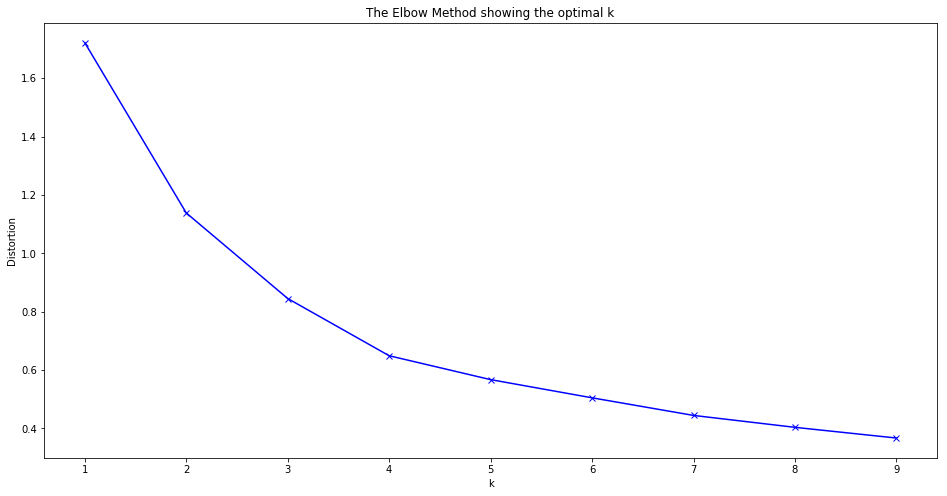

In [45]:
## Drop out the city column of the grouped data for model training
world_grouped_clustering = world_merged_cluster.drop(['City'], axis = 1)

## import machine learning packages
import sklearn
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(world_grouped_clustering)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [46]:
## Drop out the city column of the grouped data for model training
world_grouped_clustering = world_merged_cluster.drop(['City'], axis = 1)

## import machine learning packages
import sklearn
from sklearn.cluster import KMeans

## Create and fit a kmeans model 
model_kmeans = KMeans(n_clusters = 7, random_state = 0)
model_kmeans.fit(world_grouped_clustering)

## Check out the labels
kmeans_labels = model_kmeans.labels_
kmeans_labels

array([2, 1, 1, 2, 5, 0, 0, 4, 4, 4, 5, 2, 6, 0, 1, 2, 5, 3, 2, 1, 6, 4,
       4, 4, 0, 4, 3, 1, 1], dtype=int32)

In [47]:
City_venue_sorted.insert(0, 'Cluster Labels', kmeans_labels)
City_venue_sorted.head()

,Cluster Labels,City,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,2,Beijing,Hotel,Historic Site,Park,Shopping Mall,Dumpling Restaurant,Café,Coffee Shop,Pizza Place,Bookstore,Temple
1,1,Berlin,Coffee Shop,Bookstore,Park,Ice Cream Shop,Concert Hall,Indie Movie Theater,Café,Wine Bar,Monument / Landmark,Bakery
2,1,Boston,Bakery,Park,Italian Restaurant,Hotel,Seafood Restaurant,Ice Cream Shop,American Restaurant,Gastropub,Historic Site,Gym
3,2,Chicago,Hotel,Park,Theater,Italian Restaurant,Yoga Studio,Grocery Store,New American Restaurant,Coffee Shop,Sandwich Place,Steakhouse
4,5,Delhi,Indian Restaurant,Hotel,Café,Bar,BBQ Joint,Lounge,Deli / Bodega,Tibetan Restaurant,Fast Food Restaurant,Coffee Shop


In [48]:
## Check out the shape of the City_venue_sorted
City_venue_sorted.shape

(29, 12)

In [49]:
City_df.shape

(29, 4)

In [50]:
## Since the two dataframes have the same shape, we can merge them on the Postal Code
City_venue_sorted = City_venue_sorted.replace('Seoul–Incheon', 'Seoul')
world_merged = City_df
world_merged = world_merged.replace('Seoul–Incheon', 'Seoul')
world_merged = world_merged.join(City_venue_sorted.set_index('City'), on = 'City')

world_merged

,City,Latitude,Longitude,Country,Cluster Labels,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,New York,40.712728,-74.006015,US,3,Park,Ice Cream Shop,Bakery,Scenic Lookout,Bookstore,Italian Restaurant,Cycle Studio,Sandwich Place,Seafood Restaurant,French Restaurant
1,London,51.507322,-0.127647,UK,2,Hotel,Park,Art Museum,Bookstore,Coffee Shop,Department Store,Art Gallery,Cocktail Bar,Boutique,Plaza
2,Edinburgh,55.953346,-3.188375,UK,0,Hotel,Park,Pub,Coffee Shop,Café,Cocktail Bar,Beer Bar,Bar,Bakery,Restaurant
3,Toronto,43.653482,-79.383935,Canada,1,Park,Coffee Shop,Café,Bakery,Italian Restaurant,Restaurant,Gym,Sandwich Place,Mediterranean Restaurant,Historic Site
4,Sydney,-33.854816,151.216454,Australia,0,Café,Park,Scenic Lookout,Theater,Bakery,Hotel,Coffee Shop,Cocktail Bar,Bar,Pub
5,Singapore,1.340863,103.830392,Singapore,4,Hotel,Park,Japanese Restaurant,Italian Restaurant,Shopping Mall,Café,Supermarket,Chinese Restaurant,Clothing Store,Cosmetics Shop
6,Melbourne,-37.814218,144.963161,Australia,0,Café,Coffee Shop,Park,Cocktail Bar,Hotel,Plaza,Bar,Performing Arts Venue,Thai Restaurant,Wine Bar
7,Hong Kong,22.279328,114.162813,China,4,Hotel,Coffee Shop,Café,Shopping Mall,Park,Scenic Lookout,Italian Restaurant,Supermarket,Dumpling Restaurant,Dessert Shop
8,Los Angeles,34.053691,-118.242767,US,6,Coffee Shop,Taco Place,American Restaurant,Bakery,Bookstore,Theater,Park,Brewery,Art Gallery,Food Truck
9,Chicago,41.875562,-87.624421,US,2,Hotel,Park,Theater,Italian Restaurant,Yoga Studio,Grocery Store,New American Restaurant,Coffee Shop,Sandwich Place,Steakhouse


In [51]:
## import necessary lib and packages
import matplotlib.cm as cm
import matplotlib.colors as colors

## Create map
map_clusters = folium.Map()

## set color scheme for the clusters
x = np.arange(6)
ys = [i + x + (i*x)**2 for i in range(6)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, city, country,cluster in zip(world_merged['Latitude'], world_merged['Longitude'], world_merged['City'], world_merged['Country'],world_merged['Cluster Labels']):
    label = folium.Popup(str(city) + ',' + str(country) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)

map_clusters

In [52]:
## Filter out the cluster 0 cities and change the column name to cluster 0
Cluster0 = pd.DataFrame(world_merged[world_merged['Cluster Labels'] == 0][['City', 'Country']])
Cluster0.columns = ['City', 'Country']
Cluster0 = pd.DataFrame(world_merged[world_merged['Cluster Labels'] == 0][['City', 'Country']]).replace('Seoul–Incheon','Seoul')
Cluster0.columns = ['City', 'Country']
Cluster0 = Cluster0.join(City_venue_sorted.set_index('City'), on = 'City')
Cluster0 = Cluster0.join(gdp_filtered_sorted1.set_index('City'), on = 'City')
Cluster0 = Cluster0.join(temp_sorted.set_index('City'), on = 'City')
Cluster0

,City,Country,Cluster Labels,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Normalized GDP,GDP,Normalized Temperature,Temperature
2,Edinburgh,UK,0,Hotel,Park,Pub,Coffee Shop,Café,Cocktail Bar,Beer Bar,Bar,Bakery,Restaurant,0.010178,32.5,0.093751,9.3
4,Sydney,Australia,0,Café,Park,Scenic Lookout,Theater,Bakery,Hotel,Coffee Shop,Cocktail Bar,Bar,Pub,0.069962,223.4,0.178428,17.7
6,Melbourne,Australia,0,Café,Coffee Shop,Park,Cocktail Bar,Hotel,Plaza,Bar,Performing Arts Venue,Thai Restaurant,Wine Bar,0.055869,178.4,0.152219,15.1
12,Dublin,Ireland,0,Café,Pub,Coffee Shop,Park,Restaurant,Hotel,Plaza,Beer Bar,Brewery,Gastropub,0.028216,90.1,0.098791,9.8


This cluster has 4 cities, There Cafe,coffee shops,Hotel,Bakery and Pub the most famous.

In [53]:
## Filter out the cluster 1 cities and change the column name to cluster 1
City_venue_sorted = City_venue_sorted.replace('Seoul–Incheon', 'Seoul')
Cluster1 = pd.DataFrame(world_merged[world_merged['Cluster Labels'] == 1][['City', 'Country']]).replace('Seoul–Incheon','Seoul')
Cluster1.columns = ['City', 'Country']
Cluster1 = Cluster1.join(City_venue_sorted.set_index('City'), on = 'City')
Cluster1 = Cluster1.join(gdp_filtered_sorted1.set_index('City'), on = 'City')
Cluster1 = Cluster1.join(temp_sorted.set_index('City'), on = 'City')
Cluster1

,City,Country,Cluster Labels,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Normalized GDP,GDP,Normalized Temperature,Temperature
3,Toronto,Canada,1,Park,Coffee Shop,Café,Bakery,Italian Restaurant,Restaurant,Gym,Sandwich Place,Mediterranean Restaurant,Historic Site,0.086528,276.3,0.094759,9.4
10,Boston,US,1,Bakery,Park,Italian Restaurant,Hotel,Seafood Restaurant,Ice Cream Shop,American Restaurant,Gastropub,Historic Site,Gym,0.112772,360.1,0.109880,10.9
11,San Francisco,US,1,Coffee Shop,Park,Bakery,Grocery Store,Yoga Studio,Pizza Place,Ice Cream Shop,Wine Bar,Sushi Restaurant,Sandwich Place,0.103659,331.0,0.147178,14.6
13,Washington,US,1,Hotel,Monument / Landmark,Art Museum,Ice Cream Shop,American Restaurant,Coffee Shop,Park,History Museum,Garden,French Restaurant,0.138483,442.2,0.147178,14.6
24,Berlin,Germany,1,Coffee Shop,Bookstore,Park,Ice Cream Shop,Concert Hall,Indie Movie Theater,Café,Wine Bar,Monument / Landmark,Bakery,0.049387,157.7,0.103831,10.3
26,Mexico City,Mexico,1,Ice Cream Shop,Mexican Restaurant,Bakery,Park,Art Museum,Coffee Shop,Seafood Restaurant,Hotel,Asian Restaurant,Taco Place,0.126394,403.6,0.176412,17.5


This cluster has 7 cities, There coffee shops,Bakery,Pub and Cafe are the most famous.

In [54]:
## Filter out the cluster 2 cities and change the column name to cluster 2
Cluster2 = pd.DataFrame(world_merged[world_merged['Cluster Labels'] == 2][['City', 'Country']])
Cluster2.columns = ['City', 'Country']
Cluster2 = pd.DataFrame(world_merged[world_merged['Cluster Labels'] == 2][['City', 'Country']]).replace('Seoul–Incheon','Seoul')
Cluster2.columns = ['City', 'Country']
Cluster2 = Cluster2.join(City_venue_sorted.set_index('City'), on = 'City')
Cluster2 = Cluster2.join(gdp_filtered_sorted1.set_index('City'), on = 'City')
Cluster2 = Cluster2.join(temp_sorted.set_index('City'), on = 'City')
Cluster2

,City,Country,Cluster Labels,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Normalized GDP,GDP,Normalized Temperature,Temperature
1,London,UK,2,Hotel,Park,Art Museum,Bookstore,Coffee Shop,Department Store,Art Gallery,Cocktail Bar,Boutique,Plaza,0.261714,835.7,0.103831,10.3
9,Chicago,US,2,Hotel,Park,Theater,Italian Restaurant,Yoga Studio,Grocery Store,New American Restaurant,Coffee Shop,Sandwich Place,Steakhouse,0.176376,563.2,0.098791,9.8
14,Beijing,China,2,Hotel,Historic Site,Park,Shopping Mall,Dumpling Restaurant,Café,Coffee Shop,Pizza Place,Bookstore,Temple,0.158494,506.1,0.130041,12.9
21,Moscow,Russia,2,Hotel,Pizza Place,Yoga Studio,Park,Plaza,Cocktail Bar,Coffee Shop,Road,Art Gallery,Theater,0.173276,553.3,0.058468,5.8
22,Paris,France,2,Plaza,Bookstore,Hotel,Wine Bar,Cocktail Bar,Italian Restaurant,Art Museum,Bakery,Historic Site,Garden,0.223946,715.1,0.123993,12.3


These 6 cities are from all across the world. One common feature among them is that theaters are pretty popular in these cities. London, Chicago, and Moscow are four out of three cities among all with theaters in the top 3 most common venues, and they all have developed arts and entertainment industries. Besides, Hotels are popular in these cities and all 6 cities all have close GDP, which is nearly 2 times higher than that of cluster 0 cities. However, their climates are pretty different.

In [55]:
## Filter out the cluster 3 cities and change the column name to cluster 3
Cluster3 = pd.DataFrame(world_merged[world_merged['Cluster Labels'] == 3][['City', 'Country']])
Cluster3.columns = ['City', 'Country']
Cluster3 = pd.DataFrame(world_merged[world_merged['Cluster Labels'] == 3][['City', 'Country']]).replace('Seoul–Incheon','Seoul')
Cluster3.columns = ['City', 'Country']
Cluster3 = Cluster3.join(City_venue_sorted.set_index('City'), on = 'City')
Cluster3 = Cluster3.join(gdp_filtered_sorted1.set_index('City'), on = 'City')
Cluster3 = Cluster3.join(temp_sorted.set_index('City'), on = 'City')
Cluster3

,City,Country,Cluster Labels,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Normalized GDP,GDP,Normalized Temperature,Temperature
0,New York,US,3,Park,Ice Cream Shop,Bakery,Scenic Lookout,Bookstore,Italian Restaurant,Cycle Studio,Sandwich Place,Seafood Restaurant,French Restaurant,0.439374,1403.0,0.130041,12.9
19,Tokyo,Japan,3,Hotel,Ramen Restaurant,Wagashi Place,Sake Bar,BBQ Joint,Chinese Restaurant,French Restaurant,Coffee Shop,Art Museum,Park,0.506392,1617.0,0.155243,15.4


In this cluster has only 2 cities .These two cities have very different culture so setting business their will be having individual risks

In [56]:
## Filter out the cluster 4 cities and change the column name to cluster 4
Cluster4 = pd.DataFrame(world_merged[world_merged['Cluster Labels'] == 4][['City', 'Country']])
Cluster4.columns = ['City', 'Country']
Cluster4 = pd.DataFrame(world_merged[world_merged['Cluster Labels'] == 4][['City', 'Country']]).replace('Seoul–Incheon','Seoul')
Cluster4 = Cluster4.join(City_venue_sorted.set_index('City'), on = 'City')
Cluster4 = Cluster4.join(gdp_filtered_sorted1.set_index('City'), on = 'City')
Cluster4 = Cluster4.join(temp_sorted.set_index('City'), on = 'City')
Cluster4

,City,Country,Cluster Labels,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Normalized GDP,GDP,Normalized Temperature,Temperature
5,Singapore,Singapore,4,Hotel,Park,Japanese Restaurant,Italian Restaurant,Shopping Mall,Café,Supermarket,Chinese Restaurant,Clothing Store,Cosmetics Shop,0.114588,365.9,0.272179,27.0
7,Hong Kong,China,4,Hotel,Coffee Shop,Café,Shopping Mall,Park,Scenic Lookout,Italian Restaurant,Supermarket,Dumpling Restaurant,Dessert Shop,0.130278,416.0,0.234880,23.3
15,Shanghai,China,4,Hotel,Coffee Shop,Lounge,Shopping Mall,Dumpling Restaurant,Italian Restaurant,Bakery,Park,American Restaurant,Cocktail Bar,0.186022,594.0,0.168348,16.7
16,Guangzhou,China,4,Hotel,Shopping Mall,Coffee Shop,Park,Turkish Restaurant,Cantonese Restaurant,Chinese Restaurant,New American Restaurant,Middle Eastern Restaurant,Dessert Shop,0.119098,380.3,0.225808,22.4
16,Guangzhou,China,4,Hotel,Shopping Mall,Coffee Shop,Park,Turkish Restaurant,Cantonese Restaurant,Chinese Restaurant,New American Restaurant,Middle Eastern Restaurant,Dessert Shop,0.119098,380.3,0.223792,22.2
17,Shenzhen,China,4,Hotel,Coffee Shop,Shopping Mall,Electronics Store,Park,Bar,Chinese Restaurant,Hong Kong Restaurant,Theme Park,Hotpot Restaurant,0.113743,363.2,0.230848,22.9
23,Taipei,China,4,Hotel,Café,Bakery,Japanese Restaurant,Bookstore,Noodle House,Hotpot Restaurant,Park,Taiwanese Restaurant,Chinese Restaurant,0.102500,327.3,0.231856,23.0
25,Jakarta,Indonesia,4,Hotel,Coffee Shop,Shopping Mall,Sushi Restaurant,Fast Food Restaurant,Indonesian Restaurant,Buffet,Bakery,Restaurant,BBQ Joint,0.100621,321.3,0.269155,26.7


in this cluster, 5 cities from China out of 7. Their popular venues include Hotel,Coffee shops, Chinese Restaurant, which shows people in these cities are enjoying a rather slowly-paced life. These cities have a similar GDP too, which is slightly higher than that of cluster 0

In [57]:
## Filter out the cluster 5 cities and change the column name to cluster 5
Cluster5 = pd.DataFrame(world_merged[world_merged['Cluster Labels'] == 5][['City', 'Country']])
Cluster5.columns = ['City', 'Country']
Cluster5 = pd.DataFrame(world_merged[world_merged['Cluster Labels'] == 5][['City', 'Country']]).replace('Seoul–Incheon','Seoul')
Cluster5 = Cluster5.join(City_venue_sorted.set_index('City'), on = 'City')
Cluster5 = Cluster5.join(gdp_filtered_sorted1.set_index('City'), on = 'City')
Cluster5 = Cluster5.join(temp_sorted.set_index('City'), on = 'City')
Cluster5

,City,Country,Cluster Labels,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Normalized GDP,GDP,Normalized Temperature,Temperature
18,Mumbai,India,5,Indian Restaurant,Hotel,Restaurant,Dessert Shop,Scenic Lookout,Café,Pizza Place,Coffee Shop,Diner,Beach,0.047257,150.90,0.273187,27.1
27,Delhi,India,5,Indian Restaurant,Hotel,Café,Bar,BBQ Joint,Lounge,Deli / Bodega,Tibetan Restaurant,Fast Food Restaurant,Coffee Shop,0.091946,293.60,0.294356,29.2
28,Kolkata,India,5,Café,Chinese Restaurant,Indian Restaurant,Hotel,Shopping Mall,Multiplex,Mughlai Restaurant,Indian Sweet Shop,Dhaba,Dumpling Restaurant,0.047088,150.36,0.269155,26.7


These 3 cities are all located in the southern Asian areas and in India with similar climates and temperatures. Their GDP are close too and are lower than those of the cluster 1 cities. 6 of them have hotel as the most common venue and coffee shops/cafe are very popular too. This shows that tourism might be an essential source of income for these cities

In [58]:
## Filter out the cluster 6 cities and change the column name to cluster 6
Cluster6 = pd.DataFrame(world_merged[world_merged['Cluster Labels'] == 6][['City', 'Country']])
Cluster6.columns = ['City', 'Country']
Cluster6 = pd.DataFrame(world_merged[world_merged['Cluster Labels'] == 6][['City', 'Country']]).replace('Seoul–Incheon','Seoul')
Cluster6 = Cluster6.join(City_venue_sorted.set_index('City'), on = 'City')
Cluster6 = Cluster6.join(gdp_filtered_sorted1.set_index('City'), on = 'City')
Cluster6 = Cluster6.join(temp_sorted.set_index('City'), on = 'City')
Cluster6

,City,Country,Cluster Labels,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Normalized GDP,GDP,Normalized Temperature,Temperature
8,Los Angeles,US,6,Coffee Shop,Taco Place,American Restaurant,Bakery,Bookstore,Theater,Park,Brewery,Art Gallery,Food Truck,0.269481,860.5,0.187501,18.6
20,Seoul,South Korea,6,Coffee Shop,Korean Restaurant,Park,Market,Multiplex,BBQ Joint,Golf Course,Bakery,Bunsik Restaurant,Outlet Mall,0.264909,845.9,0.126009,12.5


In this cluster has only two cities one from US and other from korean country having totally different lifestyles.There coffee shops ,Bakery and Fast food Restaurant are famous and can be established in order to gain profit if qualities are much better than others.